# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition


----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.




### Mount the drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import h5py
import numpy as np

# Open the file as readonly
# Make changes in path as required
h5f = h5py.File('/content/drive/My Drive/Data Science/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

In [4]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

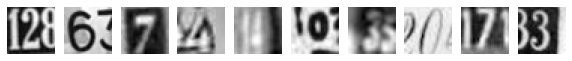

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
# visualizing the first 10 images in the dataset and their labels
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
     plt.subplot(1, 10, i+1)
     plt.imshow(X_train[i],cmap="gray")
     plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[:10]))

In [6]:
# Shape of the images and the first image
print("Shape:", X_train.shape)
print()
print("First image:\n", X_train[0])

Shape: (42000, 32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [7]:

X_train = X_train.reshape(X_train.shape[0],32,32,1)
X_test = X_test.reshape(X_test.shape[0],32,32,1)

In [8]:
# Normalize inputs from 0-255 to 0-1

X_train_normalized = X_train.astype('float32')/255
X_test_normalized = X_test.astype('float32')/255


In [9]:
# New shape 
print('Training set:', X_train.shape, y_train1.shape)
print('Test set:', X_test.shape, y_test1.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [10]:
# one hot encode output
y_train_encoded = tf.keras.utils.to_categorical(y_train1) 
y_test_encoded = tf.keras.utils.to_categorical(y_test1)

In [11]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

# Uncomment below to answer

def cnn_model_1():
    model_1 = Sequential()
     #Your code here
    model_1.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
    model_1.add(LeakyReLU(0.1))
    model_1.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model_1.add(LeakyReLU(0.1))
    model_1.add(MaxPooling2D(pool_size=2))
    model_1.add(Flatten())
    model_1.add(Dense(32))
    model_1.add(LeakyReLU(0.1))
    model_1.add(Dense(10, activation='softmax'))
    return model_1

In [12]:

Model_1_test = cnn_model_1()

Model_1_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [13]:
adam = tf.keras.optimizers.Adam(lr=0.0001)
Model_1_test.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)



In [14]:
history_1 = Model_1_test.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_test_normalized, y_test_encoded),
            shuffle=True,
            verbose=2
)

Epoch 1/10
1313/1313 - 5s - loss: 0.9622 - accuracy: 0.6942 - val_loss: 0.6207 - val_accuracy: 0.8158
Epoch 2/10
1313/1313 - 5s - loss: 0.5031 - accuracy: 0.8534 - val_loss: 0.5110 - val_accuracy: 0.8576
Epoch 3/10
1313/1313 - 5s - loss: 0.4212 - accuracy: 0.8774 - val_loss: 0.4698 - val_accuracy: 0.8653
Epoch 4/10
1313/1313 - 5s - loss: 0.3703 - accuracy: 0.8894 - val_loss: 0.4386 - val_accuracy: 0.8741
Epoch 5/10
1313/1313 - 5s - loss: 0.3269 - accuracy: 0.9022 - val_loss: 0.4378 - val_accuracy: 0.8797
Epoch 6/10
1313/1313 - 5s - loss: 0.2908 - accuracy: 0.9117 - val_loss: 0.4363 - val_accuracy: 0.8775
Epoch 7/10
1313/1313 - 5s - loss: 0.2629 - accuracy: 0.9195 - val_loss: 0.4400 - val_accuracy: 0.8814
Epoch 8/10
1313/1313 - 5s - loss: 0.2331 - accuracy: 0.9291 - val_loss: 0.4477 - val_accuracy: 0.8813
Epoch 9/10
1313/1313 - 5s - loss: 0.2084 - accuracy: 0.9371 - val_loss: 0.4861 - val_accuracy: 0.8812
Epoch 10/10
1313/1313 - 5s - loss: 0.1901 - accuracy: 0.9415 - val_loss: 0.4821 - 

### Plotting the validation and training accuracies 

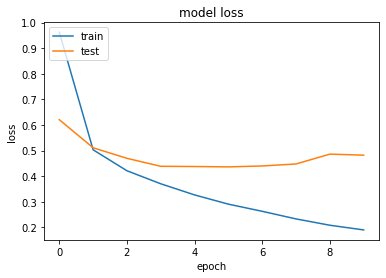

In [15]:
# plotting the accuracies
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:

def cnn_model_2():
    model_2 = Sequential()
    model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Dropout(0.2))
    model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Dropout(0.2))
    model_2.add(MaxPooling2D(pool_size=2))
    model_2.add(Flatten())
    model_2.add(Dense(256))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Dropout(0.5))
    model_2.add(Dense(10, activation='softmax'))   
    return model_2

In [17]:
#Call the function and print model summary
Model_2_test = cnn_model_2()
Model_2_test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [18]:
# Fit the model

Model_2_test.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

In [19]:
history_2 = Model_2_test.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_test_normalized, y_test_encoded),
            shuffle=True,
            verbose=2
)

Epoch 1/10
1313/1313 - 6s - loss: 1.2077 - accuracy: 0.5851 - val_loss: 0.5363 - val_accuracy: 0.8451
Epoch 2/10
1313/1313 - 6s - loss: 0.5417 - accuracy: 0.8345 - val_loss: 0.4458 - val_accuracy: 0.8703
Epoch 3/10
1313/1313 - 6s - loss: 0.4555 - accuracy: 0.8612 - val_loss: 0.4504 - val_accuracy: 0.8707
Epoch 4/10
1313/1313 - 6s - loss: 0.4049 - accuracy: 0.8768 - val_loss: 0.4084 - val_accuracy: 0.8831
Epoch 5/10
1313/1313 - 6s - loss: 0.3712 - accuracy: 0.8847 - val_loss: 0.4185 - val_accuracy: 0.8814
Epoch 6/10
1313/1313 - 6s - loss: 0.3399 - accuracy: 0.8952 - val_loss: 0.4095 - val_accuracy: 0.8871
Epoch 7/10
1313/1313 - 6s - loss: 0.3159 - accuracy: 0.9010 - val_loss: 0.3920 - val_accuracy: 0.8908
Epoch 8/10
1313/1313 - 7s - loss: 0.2969 - accuracy: 0.9082 - val_loss: 0.3895 - val_accuracy: 0.8957
Epoch 9/10
1313/1313 - 6s - loss: 0.2775 - accuracy: 0.9118 - val_loss: 0.3885 - val_accuracy: 0.8949
Epoch 10/10
1313/1313 - 6s - loss: 0.2648 - accuracy: 0.9155 - val_loss: 0.4003 - 

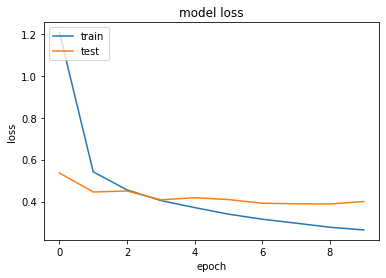

In [20]:
# plotting the accuracies
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# predict on the test dataset
y_pred_test = Model_2_test.predict(X_test_normalized)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [22]:
accuracy_score(y_test1, y_pred_test_classes)

0.8968888888888888